<a href="https://colab.research.google.com/github/GuanRuLai/Python-Maching-Learning/blob/main/Polynomial_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

## Import dataset

In [1]:
import os
if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

import pandas as pd
df = pd.read_csv("Position_Salaries.csv")

## Split independent variables and dependent variable

In [3]:
import HappyML.preprocessor as pp

X, Y = pp.decomposition(dataset=df, x_columns=[1], y_columns=[-1])
X = X.values
Y = Y.values
print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Handle missing data

In [4]:
print(df.isnull().sum())

Position    0
Level       0
Salary      0
dtype: int64


# Linear model processing & comparing

## Model training - Simple

In [5]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, Y)

LinearRegression()

## Visualizing results

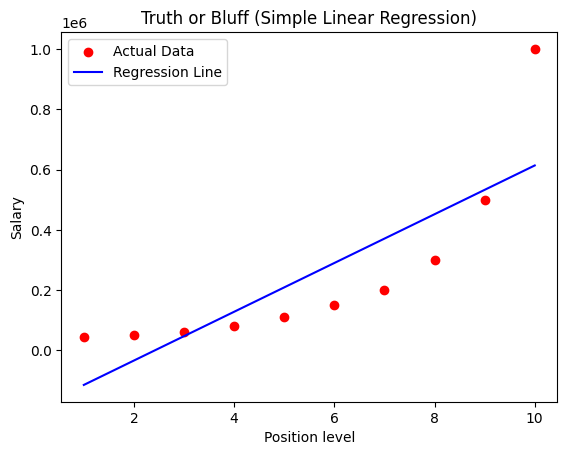

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X, Y, color = 'red', label='Actual Data')
plt.plot(X, regressor.predict(X), color = 'blue', label='Regression Line')
plt.title("Truth or Bluff (Simple Linear Regression)")
plt.xlabel("Position level")
plt.ylabel('Salary')
plt.legend()
plt.show()

## Answer prediction

In [7]:
print(regressor.predict([[8.5]]))

[[492136.36363636]]


## Getting the final linear regression equation with the values of the coefficients

In [9]:
print(regressor.coef_)
print(regressor.intercept_)
# Salary = 80878.79 × Level - 195333.33

[[80878.78787879]]
[-195333.33333333]


## Model training - Polynomial

In [12]:
# create new features
from sklearn.preprocessing import PolynomialFeatures

poly_regressor = PolynomialFeatures(degree=4)
X_poly = poly_regressor.fit_transform(X)
print(X_poly)

regressor2 = LinearRegression()
regressor2.fit(X_poly, Y)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


LinearRegression()

## Visualizing results

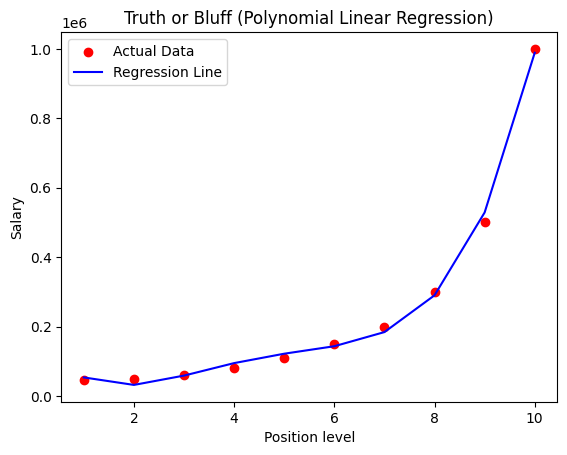

In [21]:
plt.scatter(X, Y, color = 'red', label='Actual Data')
plt.plot(X, regressor2.predict(poly_regressor.fit_transform(X)), color = 'blue', label='Regression Line')
plt.title("Truth or Bluff (Polynomial Linear Regression)")
plt.xlabel("Position level")
plt.ylabel('Salary')
plt.legend()
plt.show()

## Visualizing results(smoother curve & higher resolution)

[[1. ]
 [1.1]
 [1.2]
 [1.3]
 [1.4]
 [1.5]
 [1.6]
 [1.7]
 [1.8]
 [1.9]
 [2. ]
 [2.1]
 [2.2]
 [2.3]
 [2.4]
 [2.5]
 [2.6]
 [2.7]
 [2.8]
 [2.9]
 [3. ]
 [3.1]
 [3.2]
 [3.3]
 [3.4]
 [3.5]
 [3.6]
 [3.7]
 [3.8]
 [3.9]
 [4. ]
 [4.1]
 [4.2]
 [4.3]
 [4.4]
 [4.5]
 [4.6]
 [4.7]
 [4.8]
 [4.9]
 [5. ]
 [5.1]
 [5.2]
 [5.3]
 [5.4]
 [5.5]
 [5.6]
 [5.7]
 [5.8]
 [5.9]
 [6. ]
 [6.1]
 [6.2]
 [6.3]
 [6.4]
 [6.5]
 [6.6]
 [6.7]
 [6.8]
 [6.9]
 [7. ]
 [7.1]
 [7.2]
 [7.3]
 [7.4]
 [7.5]
 [7.6]
 [7.7]
 [7.8]
 [7.9]
 [8. ]
 [8.1]
 [8.2]
 [8.3]
 [8.4]
 [8.5]
 [8.6]
 [8.7]
 [8.8]
 [8.9]
 [9. ]
 [9.1]
 [9.2]
 [9.3]
 [9.4]
 [9.5]
 [9.6]
 [9.7]
 [9.8]
 [9.9]]


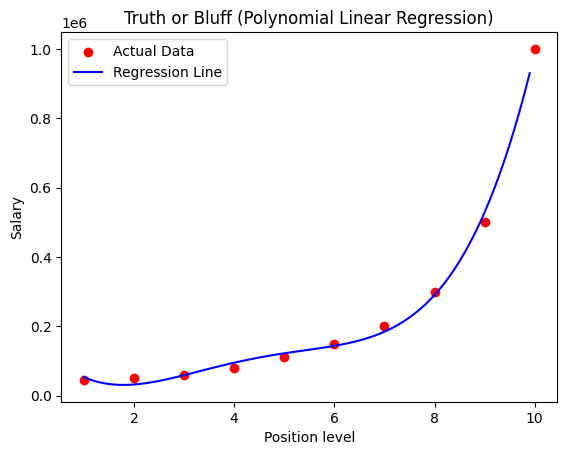

In [23]:
import numpy as np

X_grid = np.arange(min(X), max(X), 0.1) # add float
X_grid = X_grid.reshape((len(X_grid), 1)) # turn 1 row, 10 columns into 10 rows, 1 column
print(X_grid)

plt.scatter(X, Y, color = 'red', label='Actual Data')
plt.plot(X_grid, regressor2.predict(poly_regressor.fit_transform(X_grid)), color = 'blue', label='Regression Line')
plt.title("Truth or Bluff (Polynomial Linear Regression)")
plt.xlabel("Position level")
plt.ylabel('Salary')
plt.legend()
plt.show()

## Answer prediction

In [16]:
print(regressor2.predict(poly_regressor.fit_transform([[8.5]])))

[[387705.69274474]]


## Getting the final linear regression equation with the values of the coefficients

In [19]:
print(regressor2.coef_)
print(regressor2.intercept_)
# Salary = 0 × Level - 211002.33 × Level + 94765.44 × Level -
# 15463.29 × Level + 890.15 × Level + 184166.67

[[      0.         -211002.33100292   94765.44289063  -15463.28671331
      890.15151515]]
[184166.6666672]
